[Brittany_Schwan](https://www.youtube.com/watch?v=Q9dAaw_bJ-o)

In [5]:
%matplotlib inline

### Computation of $\int_0^1\frac{log(1+x)}{x}dx$ using Monte Carlo
$$\begin{array}{lll}
\mathbb{E}_{X\sim f_{old}}g(X)
&=&\int_{-\infty}^\infty g(x)f_{old}(x)dx\\
&\approx&\frac{1}{n}\sum_{i=1}^n g(x_i)\quad\mbox{for $x_i\sim f_{old}$}
\end{array}$$
where
$$
f_{old}(x)=1(0<x<1)
$$

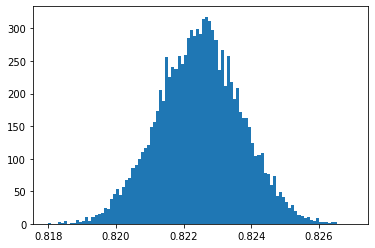

mean of mc: 0.822468428125853
std of mc: 0.0012199192184293402


In [6]:
import numpy as np
import matplotlib.pyplot as plt


def g(x):
    return np.log(1+x)/x


n = 5000 # number of samples to estimate integral
n_MC = 10000 # number of MC estimate integral 

x = np.random.uniform(0., 1., (n_MC, n))
MC = np.mean(g(x), axis=1) 

bins = np.linspace(0.818,0.827,100)
plt.hist(MC, bins=bins)
plt.show()

print('mean of mc: {}'.format(np.mean(MC)))
print('std of mc: {}'.format(np.std(MC)))

### Computation of $\int_0^1\frac{log(1+x)}{x}dx$ using importance sampling
$$\begin{array}{lll}
\mathbb{E}_{X\sim f_{old}}g(X)&=&\int_{-\infty}^\infty g(x)f_{old}(x)dx\\
&=&\int_{-\infty}^\infty g(x)\frac{f_{old}(x)}{f_{new}(x)}f_{new}(x)dx\\
&=&\mathbb{E}_{X\sim f_{new}}g(X)\frac{f_{old}(X)}{f_{new}(X)}\\
&\approx&\frac{1}{n}\sum_{i=1}^n g(x_i)\frac{f_{old}(x_i)}{f_{new}(x_i)}\quad\mbox{for $x_i\sim f_{new}$}
\end{array}$$
where
where
$$\begin{array}{lll}
f_{old}(x)&=&1(0<x<1)\\
f_{new}(x)&=&\frac{e^{-x/3}}{3(1-e^{-1/3})}1(0<x<1)\\
\end{array}$$

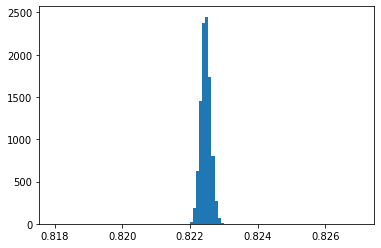

mean of mc: 0.8224679528736242
std of mc: 0.00014105710856373254


In [7]:
import numpy as np
import matplotlib.pyplot as plt


def g(x):
    return np.log(1+x)/x


def f_old(x):
    return 1


def f_new(x):
    return np.exp(-x/3) / (3*(1-np.exp(-1/3)))
    

n = 5000 # number of samples to estimate integral
n_MC = 10000 # number of MC estimate integral 

u = np.random.uniform(0., 1., (n_MC, n))
x = -3*np.log(1-u*(1-np.exp(-1/3))) # Smirov transform
MC = np.mean(g(x)*f_old(x)/f_new(x), axis=1) 

bins = np.linspace(0.818,0.827,100)
plt.hist(MC, bins=bins)
plt.show()

print('mean of mc: {}'.format(np.mean(MC)))
print('std of mc: {}'.format(np.std(MC)))

### How to choose $f_{new}$

- $\frac{g(x)}{f_{new}(x)}\approx\mbox{Constant}$ 

- Easy to sample

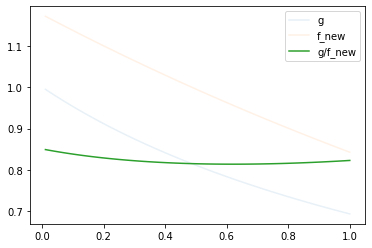

In [10]:
import numpy as np
import matplotlib.pyplot as plt


def g(x):
    return np.log(1+x)/x


def f_new(x):
    return np.exp(-x/3) / (3*(1-np.exp(-1/3)))


x = np.linspace(0.,1.,100)[1:]
plt.plot(x, g(x), label="g", alpha=0.1)
plt.plot(x, f_new(x), label="f_new", alpha=0.1)
plt.plot(x, g(x)/f_new(x), label="g/f_new")
plt.legend()
plt.show()